In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import sqlite3
import matplotlib.pyplot as plt


In [2]:
conn=sqlite3.connect('inventory.db')

In [78]:
# Load full table once
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
# Query 1: Filter rows where grossprofit > 0
df = pd.read_sql_query("""
    SELECT * 
    FROM vendor_sales_summary 
    WHERE grossprofit > 0
""", conn)

# Query 2: Filter rows where "profit margin" < 110
df = pd.read_sql_query("""
    SELECT * 
    FROM vendor_sales_summary 
    WHERE "profit margin" < 110
""", conn)

# Query 3: Filter rows where "profit margin" > 0
df = pd.read_sql_query("""
    SELECT * 
    FROM vendor_sales_summary 
    WHERE "profit margin" > 0
""", conn)

# Apply filters
df = df[df["grossprofit"] > 0]
df = df[df["profit margin"] < 110]
df = df[df["profit margin"] > 0]



In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8761.0,10287.793288,18048.766450,2.000000,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8761.0,17866.611232,12889.308275,58.000000,5667.000000,18107.000000,25153.000000,9.063100e+04
PurchasePrice,8761.0,22.052731,80.609580,0.710000,6.800000,10.270000,18.110000,3.352930e+03
ActualPrice,8761.0,32.634053,111.559082,0.990000,10.990000,15.990000,26.990000,4.559990e+03
Volume,8761.0,874.845908,714.466603,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8761.0,3341.878781,9754.265740,1.000000,47.000000,428.000000,2519.000000,2.156680e+05
TotalPurchaseDollars,8761.0,35425.709926,135206.153279,3.350000,598.650000,5158.400000,26515.710000,3.811252e+06
TotalSalesQuantity,8761.0,3285.700377,9606.528265,1.000000,58.000000,459.000000,2496.000000,2.142380e+05
TotalSalesDollars,8761.0,50500.445211,184024.694424,4.990000,1287.540000,8401.590000,39466.500000,5.101920e+06
TotalSalesPrice,8761.0,22476.725057,48846.130686,1.790000,549.890000,4532.930000,22155.360000,6.728193e+05


<function matplotlib.pyplot.show(close=None, block=None)>

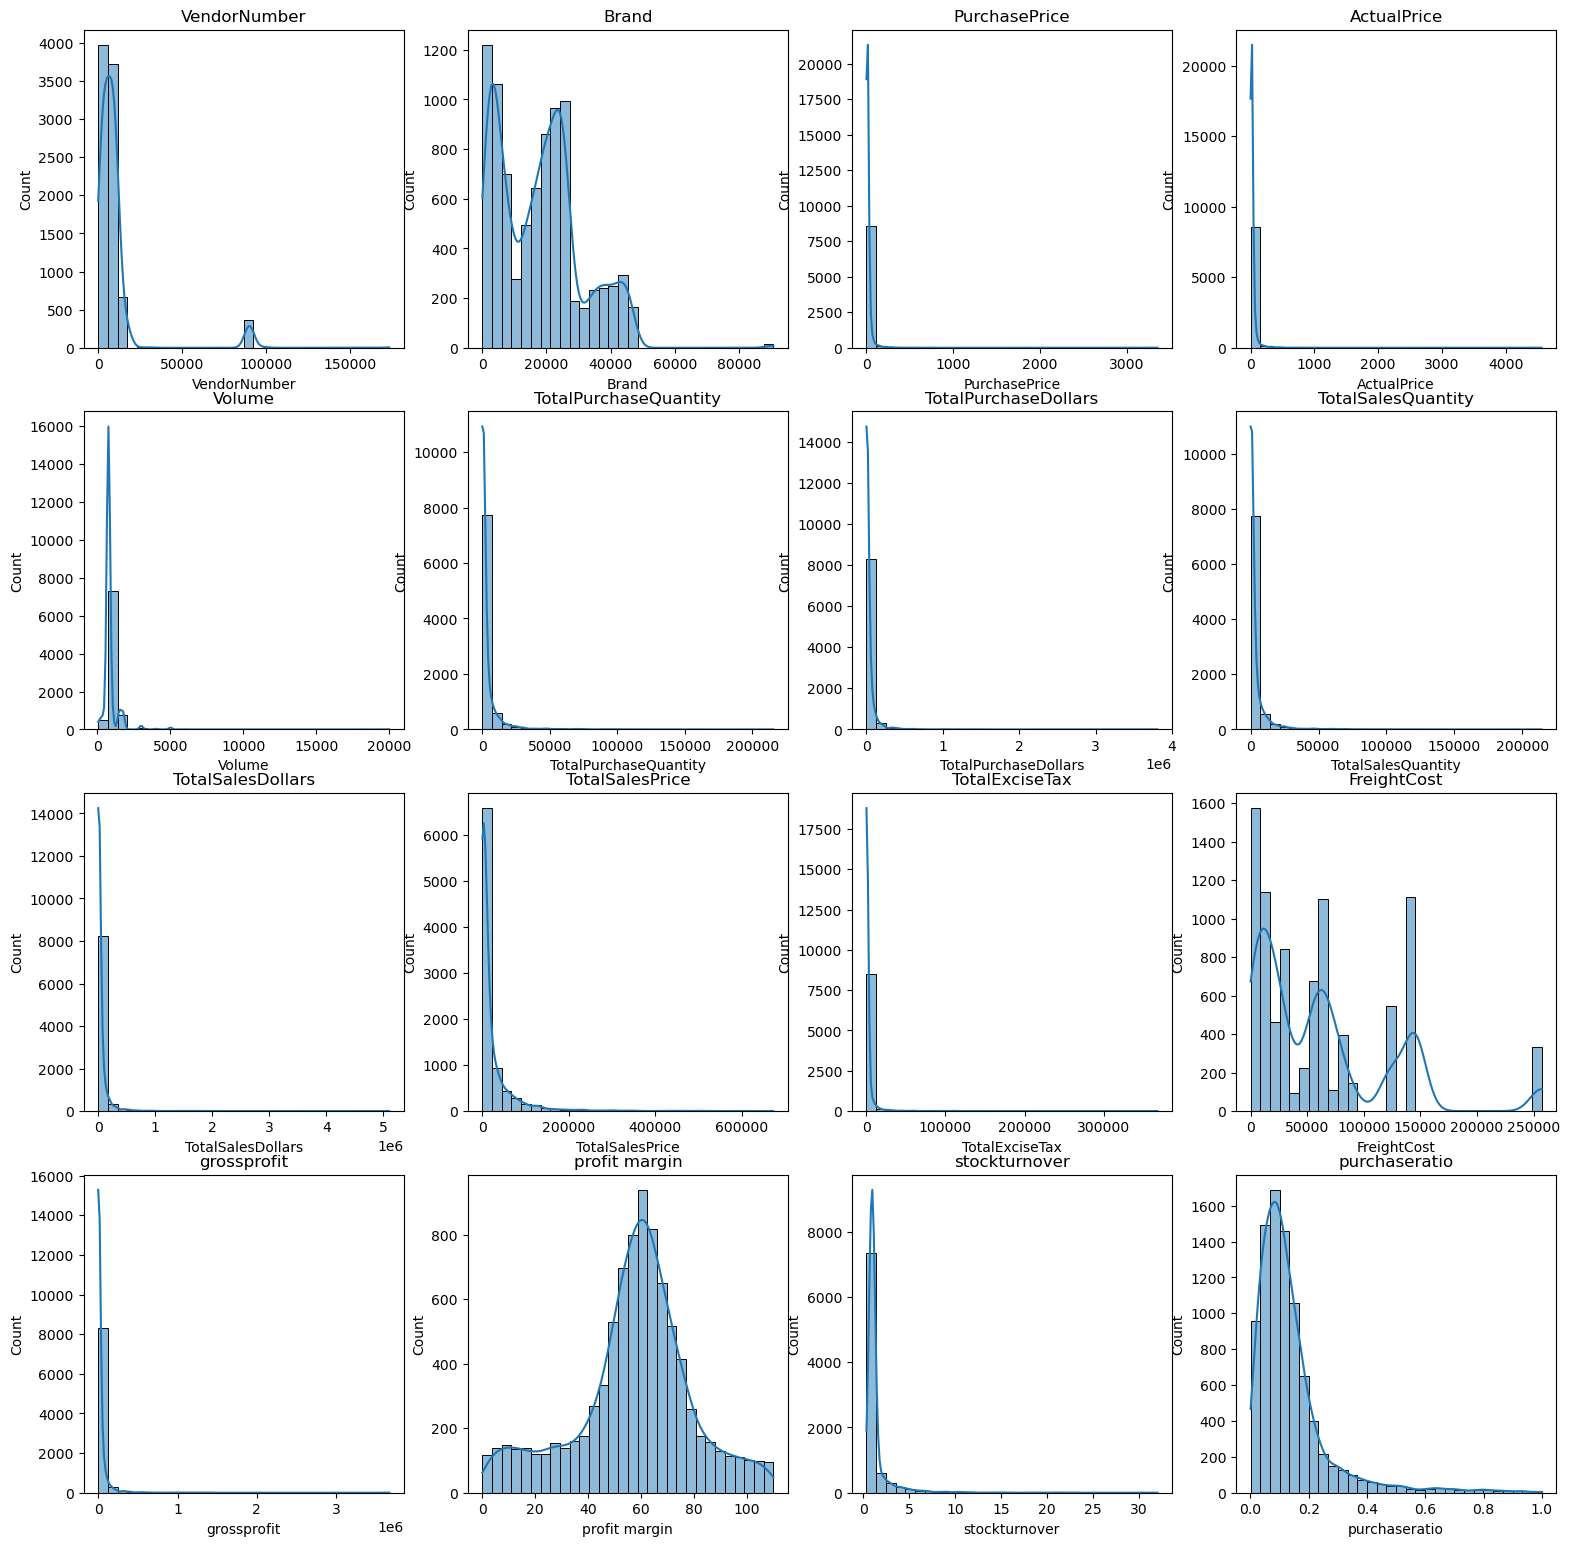

In [6]:
#distribution plots for numerical columna 
numerical_cols = df.select_dtypes(include = np.number).columns



plt.figure(figsize = (19,19))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins = 30)
    plt.title(col)
plt.tight_layout
plt.show

In [7]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'grossprofit',
       'profit margin', 'stockturnover', 'purchaseratio'],
      dtype='object')

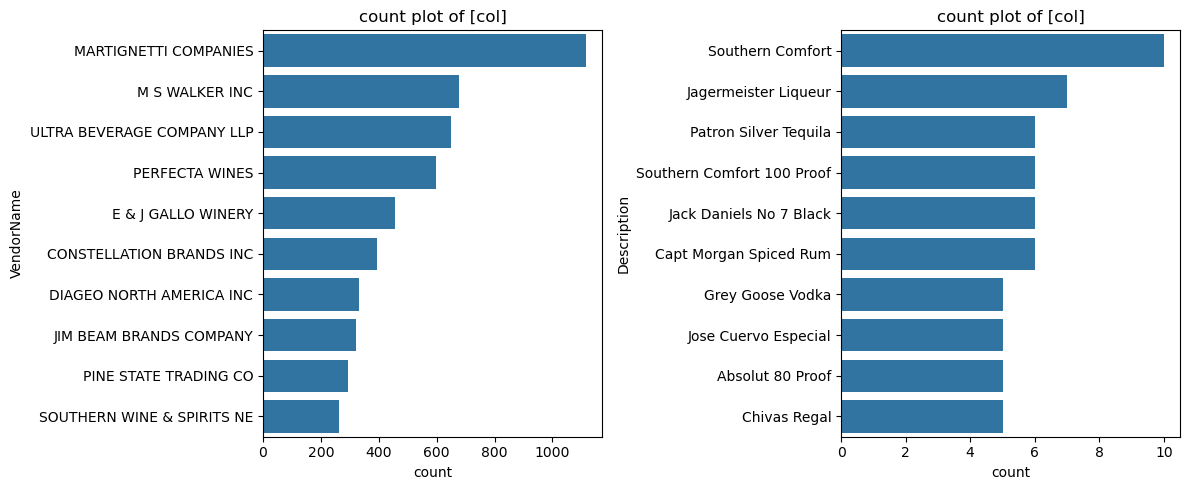

In [8]:
categorical_cols=["VendorName","Description"] #distribution plots for categorical columns

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order =df[col].value_counts().index[:10])
    plt.title(f"count plot of [col]")
plt.tight_layout()
plt.show()


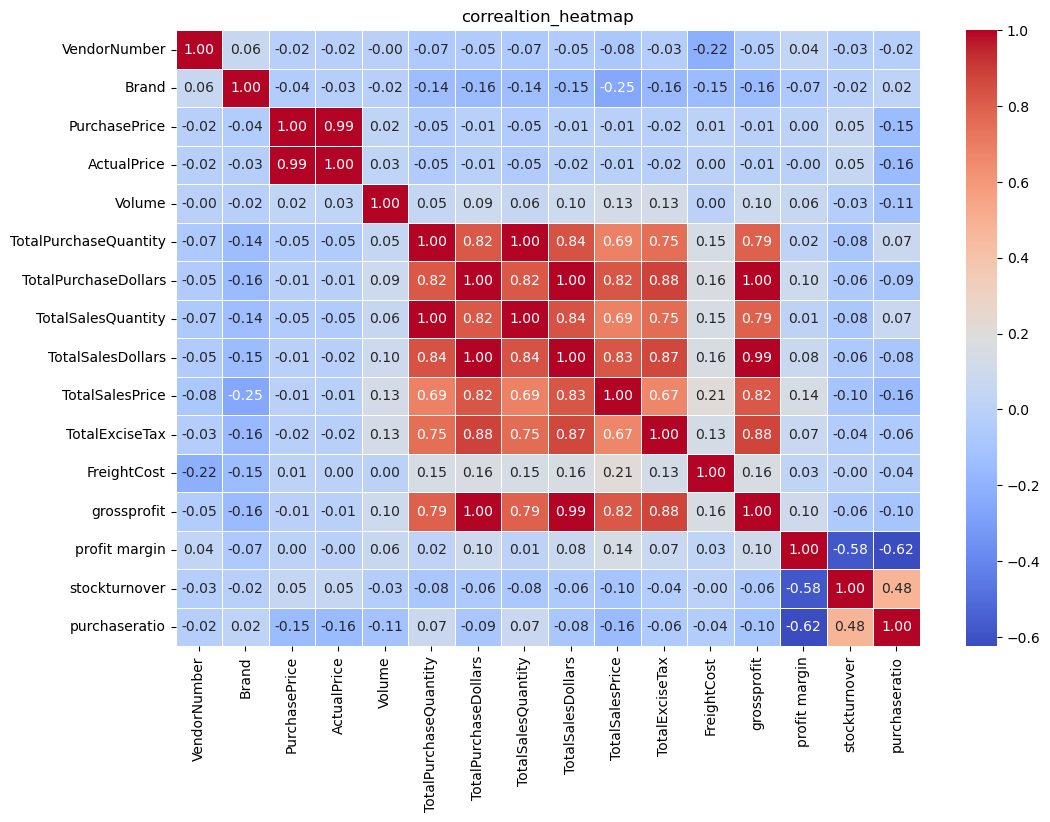

In [9]:
#corealtion heatmap

plt.figure(figsize=(12,8))
correaltion_matrix = df[numerical_cols].corr()
sns.heatmap(correaltion_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("correaltion_heatmap")
plt.show()

# data anlysis

#### identify Brands that needs promotional or pricing adjustents which exhobit lower sales perforamnce but higher profit margin

In [12]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'profit margin':'mean'
    
}).reset_index()

In [13]:
brand_performance

,Description,TotalSalesDollars,profit margin
0,(RI) 1,21519.09,79.192940
1,.nparalleled Svgn Blanc,1094.63,57.506189
2,10 Span Cab Svgn CC,2703.89,65.711253
3,10 Span Chard CC,3325.56,58.842421
4,10 Span Pnt Gris Monterey Cy,2082.22,54.422683
...,...,...,...
7947,Zorvino Vyds Sangiovese,10579.03,62.467920
7948,Zuccardi Q Malbec,1639.18,71.015996
7949,Zum Rsl,10857.34,57.506719
7950,Zwack Liqueur,227.88,78.080569


In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['profit margin'].quantile(0.85)

In [15]:
low_sales_threshold 

539.926

In [16]:
high_margin_threshold 

76.51204233365438

In [17]:
#filter brands with low sales but high profit margin
target_brands=brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_threshold )&
(brand_performance['profit margin'] <= high_margin_threshold  )
]

print("brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

brands with low sales but high profit margins:


,Description,TotalSalesDollars,profit margin
7163,Terruzzi & Puthod Vernaccia,4.99,47.494990
151,Albero Sparkling Wh Organic,5.79,54.231434
2983,Firefly Ridge Chard,5.79,51.640760
184,Allen's Blue Curacao Liqueur,5.99,63.272120
4248,Kirkland Signature Supr Brdx,7.99,54.568210
...,...,...,...
7165,Thatchers Organic Cucumber,539.46,65.165165
5524,Ozeki Yamadanishiki Jun Sake,539.46,50.050050
3792,Ilauri Bajo Montplc d'Abruzo,539.70,48.526959
6817,St Clement Carneros Chard,539.73,64.309933


In [18]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars'] < 10000]
brand_performance=brand_performance[brand_performance['profit margin'] <100]

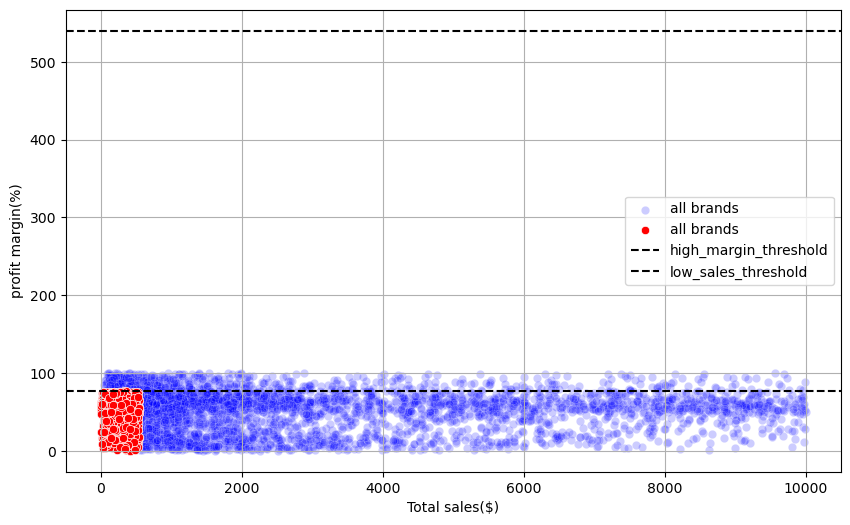

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='profit margin',color="blue",label="all brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='profit margin',color="red",label="all brands")

plt.axhline(high_margin_threshold,linestyle='--',color='black',label='high_margin_threshold')
plt.axhline(low_sales_threshold ,linestyle='--',color='black',label='low_sales_threshold')

plt.xlabel("Total sales($)")
plt.ylabel("profit margin(%)")
plt.legend()
plt.grid(True)

In [20]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'grossprofit',
       'profit margin', 'stockturnover', 'purchaseratio'],
      dtype='object')

## which vindor and brands demonstrate the highest sales performance

In [22]:
def format_dollar(value):
    if pd.isna(value):
        return ""
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return f"{value:.2f}"


In [23]:
top_vendor=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [24]:
top_vendor

VendorName
DIAGEO NORTH AMERICA INC      66692877.97
MARTIGNETTI COMPANIES         40039766.28
PERNOD RICARD USA             32145252.71
JIM BEAM BRANDS COMPANY       31141472.22
BACARDI USA INC               24797827.40
CONSTELLATION BRANDS INC      24328465.96
E & J GALLO WINERY            18454855.45
BROWN-FORMAN CORP             18132007.18
ULTRA BEVERAGE COMPANY LLP    16945880.35
M S WALKER INC                14998791.20
Name: TotalSalesDollars, dtype: float64

In [25]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [26]:
top_vendor.apply(lambda x :format_dollar(x))

VendorName
DIAGEO NORTH AMERICA INC      66.69M
MARTIGNETTI COMPANIES         40.04M
PERNOD RICARD USA             32.15M
JIM BEAM BRANDS COMPANY       31.14M
BACARDI USA INC               24.80M
CONSTELLATION BRANDS INC      24.33M
E & J GALLO WINERY            18.45M
BROWN-FORMAN CORP             18.13M
ULTRA BEVERAGE COMPANY LLP    16.95M
M S WALKER INC                15.00M
Name: TotalSalesDollars, dtype: object

In [27]:
top_brands.apply(lambda x :format_dollar(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

C:\Users\46575\AppData\Local\Temp\ipykernel_24788\2857005360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.barplot(y=top_vendor.index,x=top_vendor.values,palette="Blues_r")
C:\Users\46575\AppData\Local\Temp\ipykernel_24788\2857005360.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.barplot(y=top_brands.index,x=top_brands.values,palette="Reds_r")


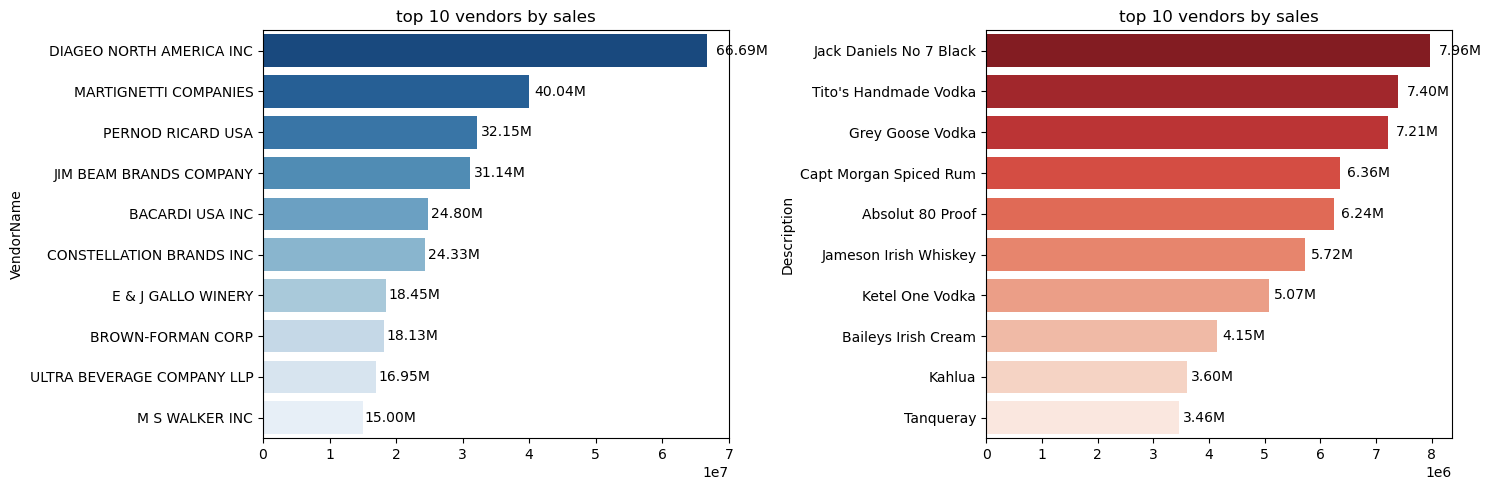

In [28]:
plt.figure(figsize=(15,5))

#plot for top vendor
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendor.index,x=top_vendor.values,palette="Blues_r")
plt.title("top 10 vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollar(bar.get_width()),
            ha='left',va='center', fontsize=10,color = 'black')
    #plot for top brand
plt.subplot(1,2,2)
ax1=sns.barplot(y=top_brands.index,x=top_brands.values,palette="Reds_r")
plt.title("top 10 vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollar(bar.get_width()),
            ha='left',va='center', fontsize=10,color = 'black')
plt.tight_layout()
plt.show()

# which vendors contribute the most to total purchase dollars?

In [30]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'grossprofit',
       'profit margin', 'stockturnover', 'purchaseratio'],
      dtype='object')

In [31]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'grossprofit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100
)


In [32]:
vendor_performance

,VendorName,TotalPurchaseDollars,grossprofit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,76703.65,72725.65,67576.22,0.024714
1,ALISA CARR BEVERAGES,34951.68,33969.68,113590.18,0.011261
2,ALTAMAR BRANDS LLC,11706.20,11387.20,15706.81,0.003772
3,AMERICAN SPIRITS EXCHANGE,934.08,850.08,1511.16,0.000301
4,AMERICAN VINTAGE BEVERAGE,156357.28,141720.28,190134.63,0.050379
...,...,...,...,...,...
114,WEIN BAUER INC,43517.00,40650.00,56930.23,0.014021
115,WESTERN SPIRITS BEVERAGE CO,272579.98,253496.98,378045.67,0.087826
116,WILLIAM GRANT & SONS INC,5905387.53,5622615.53,7597368.68,1.902726
117,WINE GROUP INC,5223444.69,4356426.69,8317600.08,1.683002


In [33]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending = False),2)
vendor_performance

,VendorName,TotalPurchaseDollars,grossprofit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,49337417.28,45892882.28,66692877.97,15.90
56,MARTIGNETTI COMPANIES,26327119.96,23789179.96,40039766.28,8.48
67,PERNOD RICARD USA,23940493.35,22333309.35,32145252.71,7.71
45,JIM BEAM BRANDS COMPANY,23406793.29,21310545.29,31141472.22,7.54
6,BACARDI USA INC,17489781.62,16164371.62,24797827.40,5.64
...,...,...,...,...,...
43,"IRA GOLDMAN AND WILLIAMS, LLP",190.88,172.88,665.82,0.00
33,FANTASY FINE WINES CORP,128.64,87.64,327.59,0.00
107,UNCORKED,118.74,112.74,176.94,0.00
84,SILVER MOUNTAIN CIDERS,77.18,28.18,342.51,0.00


In [34]:
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollar)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollar)
top_vendors['grossprofit'] = top_vendors['grossprofit'].apply(format_dollar)


C:\Users\46575\AppData\Local\Temp\ipykernel_24788\3496947405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollar)
C:\Users\46575\AppData\Local\Temp\ipykernel_24788\3496947405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollar)
C:\Users\46575\AppData\Local\Temp\ipykernel_24788\3496947405.py:5: SettingWithCopyWarning: 
A value is

In [35]:
top_vendors

,VendorName,TotalPurchaseDollars,grossprofit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,49.34M,45.89M,66.69M,15.90
56,MARTIGNETTI COMPANIES,26.33M,23.79M,40.04M,8.48
67,PERNOD RICARD USA,23.94M,22.33M,32.15M,7.71
45,JIM BEAM BRANDS COMPANY,23.41M,21.31M,31.14M,7.54
6,BACARDI USA INC,17.49M,16.16M,24.80M,5.64
20,CONSTELLATION BRANDS INC,15.43M,13.18M,24.33M,4.97
11,BROWN-FORMAN CORP,13.27M,12.43M,18.13M,4.27
30,E & J GALLO WINERY,12.14M,10.36M,18.45M,3.91
106,ULTRA BEVERAGE COMPANY LLP,11.72M,10.76M,16.95M,3.78
52,M S WALKER INC,10.13M,8.83M,15.00M,3.26


In [36]:
top_vendors['total_contribution'] = top_vendors['PurchaseContribution%'].cumsum()

C:\Users\46575\AppData\Local\Temp\ipykernel_24788\2201702595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['total_contribution'] = top_vendors['PurchaseContribution%'].cumsum()


In [37]:
top_vendors

,VendorName,TotalPurchaseDollars,grossprofit,TotalSalesDollars,PurchaseContribution%,total_contribution
25,DIAGEO NORTH AMERICA INC,49.34M,45.89M,66.69M,15.90,15.90
56,MARTIGNETTI COMPANIES,26.33M,23.79M,40.04M,8.48,24.38
67,PERNOD RICARD USA,23.94M,22.33M,32.15M,7.71,32.09
45,JIM BEAM BRANDS COMPANY,23.41M,21.31M,31.14M,7.54,39.63
6,BACARDI USA INC,17.49M,16.16M,24.80M,5.64,45.27
20,CONSTELLATION BRANDS INC,15.43M,13.18M,24.33M,4.97,50.24
11,BROWN-FORMAN CORP,13.27M,12.43M,18.13M,4.27,54.51
30,E & J GALLO WINERY,12.14M,10.36M,18.45M,3.91,58.42
106,ULTRA BEVERAGE COMPANY LLP,11.72M,10.76M,16.95M,3.78,62.20
52,M S WALKER INC,10.13M,8.83M,15.00M,3.26,65.46


C:\Users\46575\AppData\Local\Temp\ipykernel_24788\400845486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\46575\AppData\Local\Temp\ipykernel_24788\400845486.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)


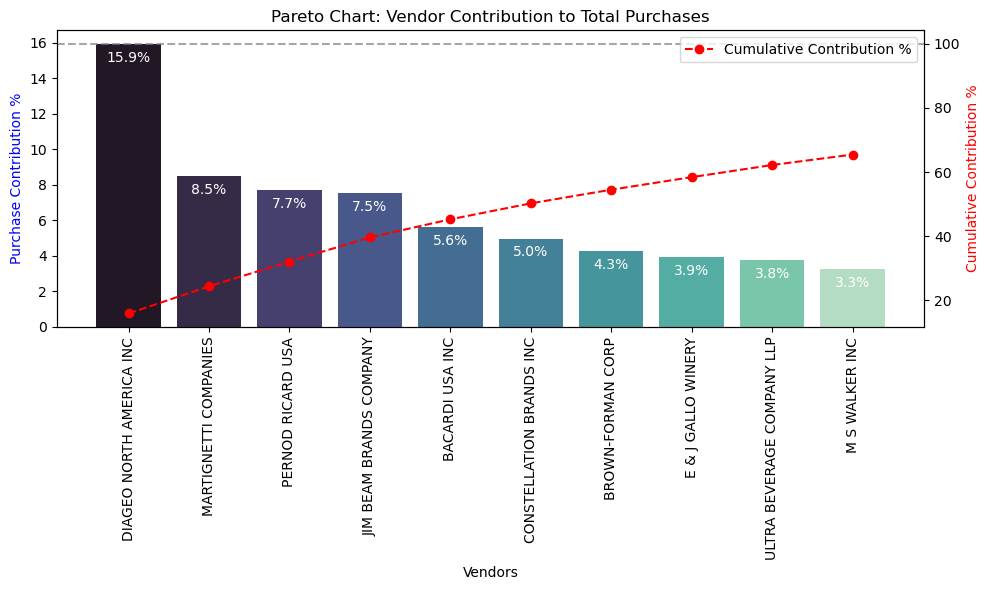

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sort by Purchase Contribution and calculate cumulative %
top_vendors = vendor_performance.sort_values(by='PurchaseContribution%', ascending=False).head(10)
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

# Step 2: Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette='mako',
    ax=ax1
)

# Add percentage labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

# Axis and labels
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Reference line and legend
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# how much total procuremnet depent upon the to vendor?

In [40]:
print(f"(total contribution of top vendor is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

(total contribution of top vendor is 65.46%


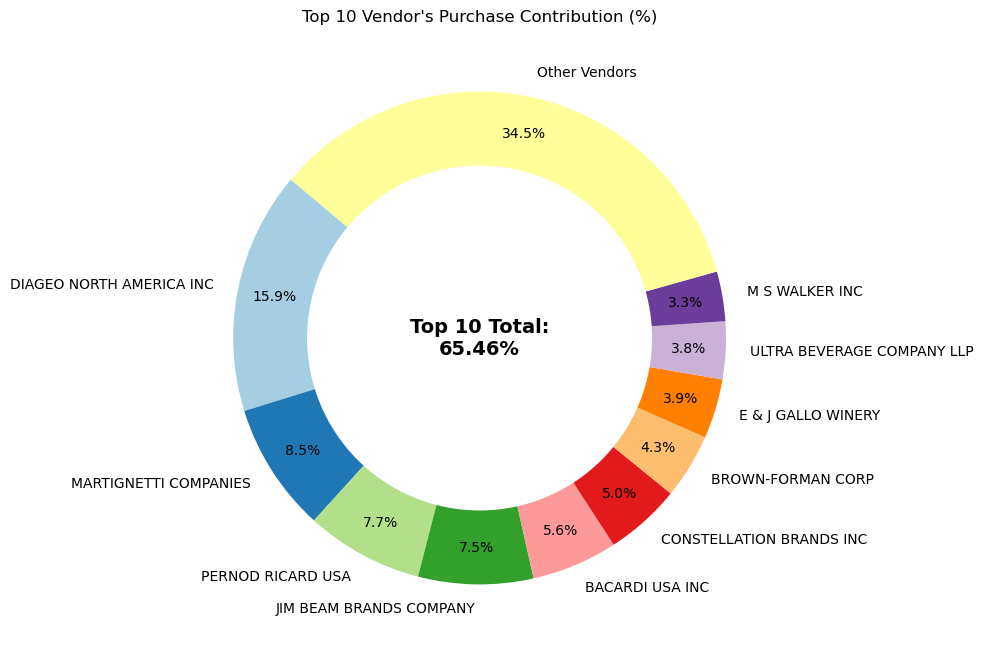

In [41]:
import matplotlib.pyplot as plt

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

# Does purchaseing in bulk reduce the unit price and white is the optimals purchase volume for cost savings?

In [43]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'grossprofit',
       'profit margin', 'stockturnover', 'purchaseratio'],
      dtype='object')

In [44]:
df['unitpurchaseprice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [45]:
df['ordersize']=pd.qcut(df["TotalPurchaseQuantity"],q=3, labels=["small","medium","large"])

In [46]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

C:\Users\46575\AppData\Local\Temp\ipykernel_24788\2867697757.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ordersize')[['unitpurchaseprice']].mean()


,unitpurchaseprice
ordersize,
small,39.138592
medium,15.909113
large,11.114235


C:\Users\46575\AppData\Local\Temp\ipykernel_24788\798441316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="ordersize",y="unitpurchaseprice",palette="Set2")


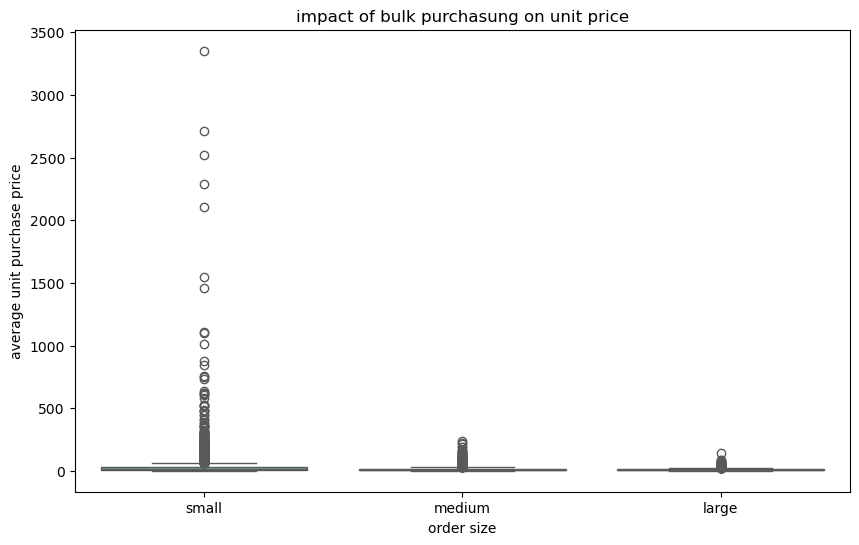

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="ordersize",y="unitpurchaseprice",palette="Set2")
plt.title("impact of bulk purchasung on unit price")
plt.xlabel("order size")
plt.ylabel("average unit purchase price")
plt.show()

###### vendors buying in bulk (large order size) get the loewest unit price($11.11 per unit).meaning higher margins if they can manage inventory afficiently
###### the price differnce betwwen small and alarge orders ub substantial [~72 reduction in init cost]
###### this suggest the bulk pricing stattegies successfully encourage vendors to ruchase in large volumes,leading to hgher overall sales despite lower per_unit


#### which vendors have low inventory tuenover,indicating excess stock and slow-moving products?

In [50]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'grossprofit',
       'profit margin', 'stockturnover', 'purchaseratio', 'unitpurchaseprice',
       'ordersize'],
      dtype='object')

In [51]:
df['unsoldvalue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']

df[df['stockturnover']<1].groupby('VendorName')[['stockturnover','unsoldvalue']].mean().sort_values(by='stockturnover', ascending=False).head(10)
df['unsoldvalue'].sum().head(10)

AttributeError: 'numpy.float64' object has no attribute 'head'

In [ ]:
result = df[df['stockturnover'] < 1] \
    .groupby('VendorName')[['stockturnover', 'UnsoldValue']] \
    .mean() \
    .sort_values(by='UnsoldValue', ascending=False) \
    .head(10) \
    .applymap(format_dollar)
print(result)

# Which vendor contributes most to total sales dollars, and how profitable are they?

In [ ]:
df.columns

In [ ]:
top_vendors = df.sort_values(by='TotalSalesDollars', ascending=False).head(15)
top_vendors['grossprofit_label'] = top_vendors['grossprofit'].apply(format_dollar)

# --- Plotting
plt.figure(figsize=(19, 11))
bubble = sns.scatterplot(
    data=top_vendors,
    x='TotalSalesDollars',
    y='profit margin',
    size='grossprofit',
    hue='VendorName',
    palette='tab10',
    sizes=(100, 2000),
    alpha=0.7,
    edgecolor='black'
)

# Add labels
# Add gross profit labels inside the bubbles
# Add formatted gross profit labels inside the bubbles
for i in range(top_vendors.shape[0]):
    plt.text(
        x=top_vendors['TotalSalesDollars'].iloc[i],
        y=top_vendors['profit margin'].iloc[i],
        s=top_vendors['grossprofit_label'].iloc[i],  # Use formatted label
        ha='center',
        va='center',
        fontsize=9,
        color='black',
        weight='bold'
    )

s = f"{top_vendors['VendorName'].iloc[i]}\n${top_vendors['grossprofit'].iloc[i]:,.0f}"

plt.title('Vendor Performance: Sales vs Profit Margin (Bubble Size = Gross Profit)')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin (%)')
plt.legend(loc='best', bbox_to_anchor=(1., 1), title='Vendor')
plt.tight_layout()
plt.show()


In [ ]:
top_vendors['grossprofit_label'] = top_vendors['grossprofit'].apply(format_dollar)
plt.savefig("vendor_bubble_chart.png", dpi=300, bbox_inches='tight')

# Plot the scatterplot
plt.figure(figsize=(19, 11))
sns.scatterplot(
    data=top_vendors,
    x='TotalSalesDollars',
    y='profit margin',
    size='grossprofit',
    hue='VendorName',
    palette='tab10',
    sizes=(100, 2000),
    alpha=0.7,
    edgecolor='black'
)

# Add vendor name above the bubble
for i in range(top_vendors.shape[0]):
    plt.text(
        x=top_vendors['TotalSalesDollars'].iloc[i],
        y=top_vendors['profit margin'].iloc[i] + 0.5,  # Slightly above bubble
        s=top_vendors['VendorName'].iloc[i],
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        weight='semibold'
    )

# Add gross profit label inside the bubble
for i in range(top_vendors.shape[0]):
    plt.text(
        x=top_vendors['TotalSalesDollars'].iloc[i],
        y=top_vendors['profit margin'].iloc[i],
        s=top_vendors['grossprofit_label'].iloc[i],
        ha='center',
        va='center',
        fontsize=9,
        color='black',
        weight='bold'
    )

# Final touches
plt.title('Vendor Performance: Sales vs Profit Margin (Bubble Size = Gross Profit)')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin (%)')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Vendor')
plt.tight_layout()
plt.savefig("vendor_bubble_chart.png", dpi=300, bbox_inches='tight')
plt.show()


## Are there vendors whose freight or excise taxes significantly reduce net profitability?

In [ ]:
df.columns

In [ ]:
cost_impact=df.groupby(['VendorNumber', 'VendorName']).agg({
 'grossprofit':'sum',
 'TotalExciseTax':'sum',
  'FreightCost':'sum'   
    
}).reset_index

df['freightimpact']=df['FreightCost']/df['grossprofit']
df['exciseteximpact']=df['TotalExciseTax']/df['grossprofit']
df['Combinedimpact']=df['freightimpact']+df['exciseteximpact']/df['grossprofit']




In [56]:
vendor_costs = df.groupby(['VendorNumber', 'VendorName']).agg({
    'grossprofit': 'sum',
    'FreightCost': 'sum',
    'TotalExciseTax': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

vendor_costs['FreightImpact'] = vendor_costs['FreightCost'] / vendor_costs['grossprofit']
vendor_costs['ExciseImpact'] = vendor_costs['TotalExciseTax'] / vendor_costs['grossprofit']
vendor_costs['CombinedImpact'] = (vendor_costs['FreightCost'] + vendor_costs['TotalExciseTax']) / vendor_costs['grossprofit']


In [58]:
high_impact = vendor_costs.sort_values(by='CombinedImpact', ascending=False)
print(high_impact[['VendorName', 'grossprofit', 'FreightImpact', 'ExciseImpact', 'CombinedImpact']].head(10))


                    VendorName  grossprofit  FreightImpact  ExciseImpact  \
40       MARTIGNETTI COMPANIES  23789179.96       6.792840      0.031388   
78              M S WALKER INC   8831131.16       4.258637      0.105892   
75  ULTRA BEVERAGE COMPANY LLP  10757043.75       4.105914      0.027499   
87              PERFECTA WINES   4373608.20       3.926934      0.014843   
23  SOUTHERN GLAZERS W&S OF NE     24177.44       3.146171      0.014315   
33          E & J GALLO WINERY  10362026.28       2.720988      0.048659   
14    CONSTELLATION BRANDS INC  13178767.31       2.371610      0.052183   
90     JIM BEAM BRANDS COMPANY  21310545.29       1.871828      0.103988   
38    DIAGEO NORTH AMERICA INC  45892882.28       1.853830      0.080497   
57       PINE STATE TRADING CO   2507244.52       1.849986      0.036146   

    CombinedImpact  
40        6.824228  
78        4.364529  
75        4.133413  
87        3.941777  
23        3.160486  
33        2.769646  
14        2.4237

In [60]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'grossprofit',
       'profit margin', 'stockturnover', 'purchaseratio', 'unitpurchaseprice',
       'ordersize', 'unsoldvalue'],
      dtype='object')

In [62]:
df.head(10)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,grossprofit,profit margin,stockturnover,purchaseratio,unitpurchaseprice,ordersize,unsoldvalue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,3669202.60,71.918081,0.979108,0.037271,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,3643794.22,75.611925,0.976890,0.042125,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,3231163.68,71.200481,0.998575,0.054746,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,3060785.94,68.382585,0.993703,0.061453,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,2887368.01,68.370695,0.983556,0.044932,21.89,large,49712.19
5,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,138809,2466635.93,141860.0,...,446932.09,111699.19,89286.27,2324775.93,68.700831,1.021980,0.057512,17.77,large,-54216.27
6,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,30.76,39.99,1750.0,70783,2177285.08,69627.0,...,614529.34,127931.67,123780.22,2107658.08,75.996344,0.983668,0.031979,30.76,large,35558.56
7,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750.0,161386,2088334.84,148265.0,...,292586.29,272422.60,257032.07,1940069.84,74.847179,0.918698,0.070997,12.94,large,169785.74
8,3960,DIAGEO NORTH AMERICA INC,3489,Tanqueray,20.73,27.99,1750.0,91835,1903739.55,90481.0,...,503661.02,166244.44,257032.07,1813258.55,68.671259,0.985256,0.047528,20.73,large,28068.42
9,12546,JIM BEAM BRANDS COMPANY,1376,Jim Beam,16.29,21.99,1750.0,108866,1773427.14,107061.0,...,426902.78,196707.35,123880.97,1666366.14,68.422874,0.983420,0.060370,16.29,large,29403.45


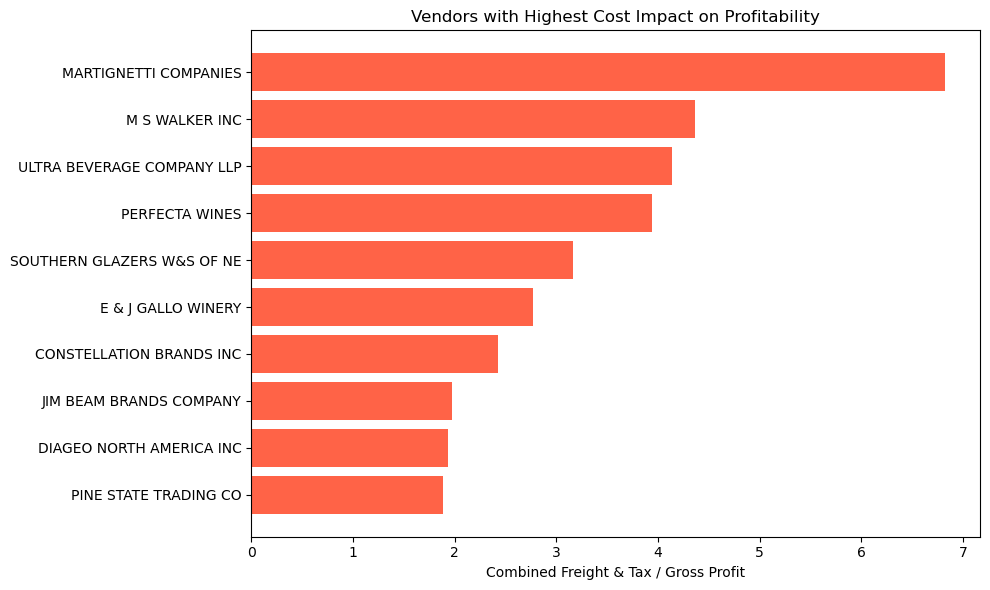

In [64]:

top_cost = high_impact.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cost['VendorName'], top_cost['CombinedImpact'], color='tomato')
plt.xlabel('Combined Freight & Tax / Gross Profit')
plt.title('Vendors with Highest Cost Impact on Profitability')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
